In [1]:
# 베르누이 시도 결과를 random variable X 로 나타낼때,
# 성공, 실패를 (1,0) 혹은 (1,-1) 만 가질 수 있도로 구분함

# Bern(x;Theta) = {Theta if x=1; 
#              (1-Theta) if x=0}

In [26]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
theta = 0.6
rv = sp.stats.bernoulli(theta)

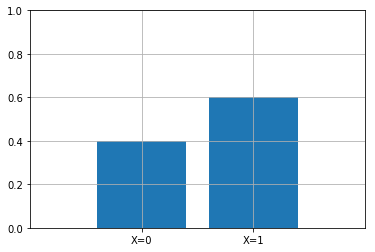

In [10]:
# prob mass ftn

xx = [0,1]
plt.bar(xx,rv.pmf(xx))
plt.xlim(-1,2)
plt.ylim(0,1)
plt.xticks([0,1],["X=0", "X=1"])
plt.grid(True)
plt.show()

In [13]:
# simulation with 100 samples
# use rvs to generate random sample

theta = 0.6
rv = sp.stats.bernoulli(theta)

x = rv.rvs(100,random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

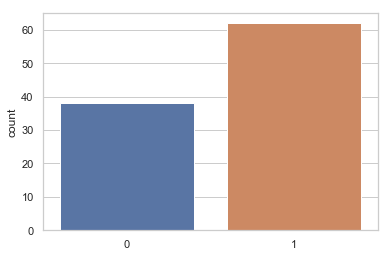

In [23]:
sns.countplot(x)
sns.set()
sns.set_style("whitegrid")
plt.show()

In [27]:
y = np.bincount(x,minlength=2)/float(len(x))
y

array([0.38, 0.62])

In [31]:
import pandas as pd

df = pd.DataFrame({"theory":rv.pmf(xx), "simulation":y})
df.index = [0,1]
print(df)

   theory  simulation
0     0.4        0.38
1     0.6        0.62


In [39]:
df2 = df.stack().reset_index()
print(df2)

   level_0     level_1     0
0        0      theory  0.40
1        0  simulation  0.38
2        1      theory  0.60
3        1  simulation  0.62


In [40]:
df2.columns = ["values", "sim/theory", "ratio"]
print(df2)

   values  sim/theory  ratio
0       0      theory   0.40
1       0  simulation   0.38
2       1      theory   0.60
3       1  simulation   0.62


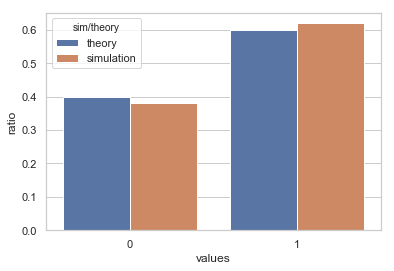

In [35]:
sns.barplot(x="values", y="ratio",hue='sim/theory',data=df2)
plt.show()